In [1]:
%matplotlib inline
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data, io, filters
from skimage import color
from skimage import img_as_float
from skimage import novice
from IPython.display import display 
from scipy.misc import imread
from scipy.misc import imsave

/anaconda3/lib/python3.6/site-packages/skimage/novice/__init__.py:103: UserWarning: The `skimage.novice` module was deprecated in version 0.14. It will be removed in 0.16.
  warnings.warn("The `skimage.novice` module was deprecated in version 0.14. "


# Import Image

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


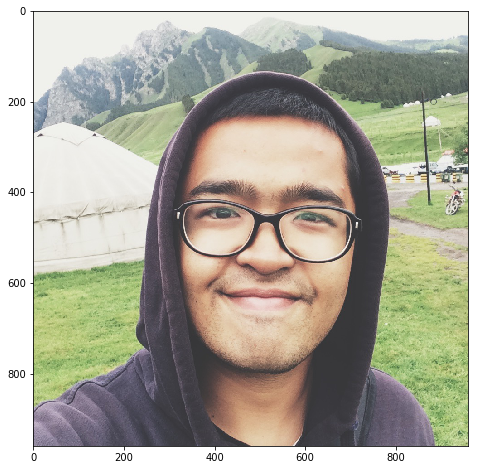

In [2]:
colourImg = Image.open('/Users/nurali/Documents/Kuerbanjiang_github/Image-Analysis/Image/c.JPG')
im = imread('/Users/nurali/Documents/Kuerbanjiang_github/Image-Analysis/Image/c.JPG')

#display(colourImg)
fig, (ax1) = plt.subplots( figsize=(12, 8),sharex=True, sharey=True)
ax1.imshow(im)

# Each Pixel Have Three Channels

## Red,Green,Blue


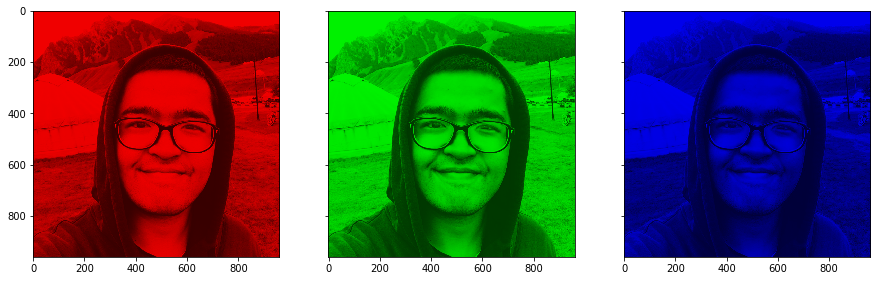

In [3]:

red_multiplier = [1, 0, 0]
Green_multiplier = [0, 1, 0]
Blue_multiplier = [0, 0, 1]

fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(15, 9),sharex=True, sharey=True)

ax1.imshow(red_multiplier * im)
ax2.imshow(Green_multiplier * im)
ax3.imshow(Blue_multiplier * im)

# Digitize the Image to Data
## Y_X Reperesent the Pixels Location, and RGB Value Come with Unit_8, 255


In [4]:
colourPixels = colourImg.convert("RGB")
colourArray = np.array(colourPixels.getdata()).reshape(colourImg.size + (3,))
indicesArray = np.moveaxis(np.indices(colourImg.size), 0, 2)
allArray = np.dstack((indicesArray, colourArray)).reshape((-1, 5))

df = pd.DataFrame(allArray, columns=["y", "x", "red","green","blue"])
df.describe()

,y,x,red,green,blue
count,921600.000000,921600.000000,921600.000000,921600.000000,921600.000000
mean,479.500000,479.500000,161.045701,158.202307,141.477589
std,277.128129,277.128129,61.741646,61.748688,55.111754
min,0.000000,0.000000,45.000000,45.000000,33.000000
25%,239.750000,239.750000,105.000000,99.000000,98.000000
50%,479.500000,479.500000,173.000000,177.000000,134.000000
75%,719.250000,719.250000,219.000000,209.000000,185.000000
max,959.000000,959.000000,255.000000,250.000000,251.000000


# Validation With Red Pic
## All G and B channels are zero value

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


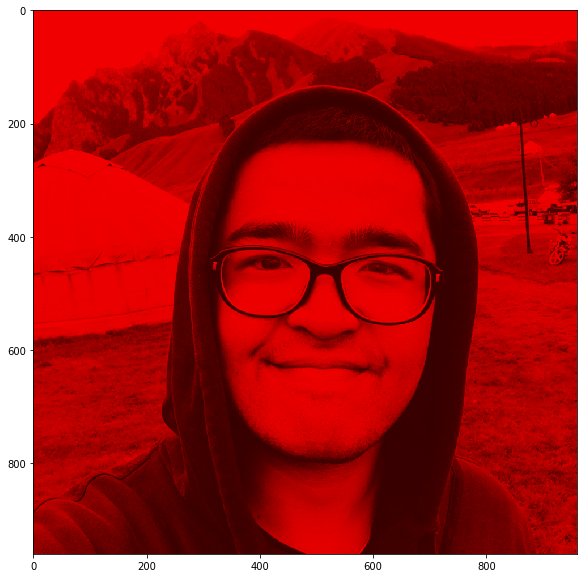

In [5]:
a=red_multiplier * im
imsave('a.png', a)
a = Image.open('/Users/nurali/Documents/Kuerbanjiang_github/Image-Analysis/Code/a.PNG')

fig, (ax1) = plt.subplots( figsize=(10, 10),sharex=True, sharey=True)
ax1.imshow(a)

In [6]:
colourPixels = a.convert("RGB")
colourArray = np.array(colourPixels.getdata()).reshape(a.size + (3,))
indicesArray = np.moveaxis(np.indices(a.size), 0, 2)
allArray = np.dstack((indicesArray, colourArray)).reshape((-1, 5))

df = pd.DataFrame(allArray, columns=["y", "x", "red","green","blue"])
df.describe()

,y,x,red,green,blue
count,921600.000000,921600.000000,921600.000000,921600.0,921600.0
mean,479.500000,479.500000,161.045701,0.0,0.0
std,277.128129,277.128129,61.741646,0.0,0.0
min,0.000000,0.000000,45.000000,0.0,0.0
25%,239.750000,239.750000,105.000000,0.0,0.0
50%,479.500000,479.500000,173.000000,0.0,0.0
75%,719.250000,719.250000,219.000000,0.0,0.0
max,959.000000,959.000000,255.000000,0.0,0.0
